#ML team 3 - Classification models

##1. Description:
Identify classification models for [team 3 dataset](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-2-EDA/EDA-Team-3/turkiye-student-evaluation_generic.csv) that predict the target variable (Q10) accurately.

#### **Features - Schema**

* instr: Instructor's identifier; values taken from {1,2,3}
* class: Course code (descriptor); values taken from {1-13}
* repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
* attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
* difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
* Q1:  The semester course content, teaching method and evaluation system were provided at the start.
* Q2:  The course aims and objectives were clearly stated at the beginning of the period.
* Q3:  The course was worth the amount of credit assigned to it.
* Q4:  The course was taught according to the syllabus announced on the first day of class.
* Q5:	The class discussions, homework assignments, applications and studies were satisfactory.
* Q6:  The textbook and other courses resources were sufficient and up to date.
* Q7:  The course allowed field work, applications, laboratory, discussion and other studies.
* Q8:  The quizzes, assignments, projects and exams contributed to helping the learning.
* Q9:  I greatly enjoyed the class and was eager to actively participate during the lectures.
* Q10: My initial expectations about the course were met at the end of the period or year.
* Q11: The course was relevant and beneficial to my professional development.
* Q12: The course helped me look at life and the world with a new perspective.
* Q13: The Instructor's knowledge was relevant and up to date.
* Q14: The Instructor came prepared for classes.
* Q15: The Instructor taught in accordance with the announced lesson plan.
* Q16: The Instructor was committed to the course and was understandable.
* Q17: The Instructor arrived on time for classes.
* Q18: The Instructor has a smooth and easy to follow delivery/speech.
* Q19: The Instructor made effective use of class hours.
* Q20: The Instructor explained the course and was eager to be helpful to students.
* Q21: The Instructor demonstrated a positive approach to students.
* Q22: The Instructor was open and respectful of the views of students about the course.
* Q23: The Instructor encouraged participation in the course.
* Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
* Q25: The Instructor responded to questions about the course inside and outside of the course.
* Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
* Q27: The Instructor provided solutions to exams and discussed them with students.
* Q28: The Instructor treated all students in a right and objective manner.

*Q1-Q28 are all Likert-type, meaning that the values are taken from: 1- Strong Disagree, 2- Disagree, 3- Neutral, 4- Agree, 5- Strongly Agree*



In [1]:
# data manipulation
import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
#classification models
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
#from sklearn.linear_model import SGDClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from lightgbm import LGBMClassifier
import xgboost as xgb #to use cv
from xgboost.sklearn import XGBClassifier
#metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
     accuracy_score, recall_score, precision_score, f1_score,\
     roc_curve, auc, roc_auc_score
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
t3_path = "/content/drive/MyDrive/OneDrive/papers/Research/ComputerScience_AI/data_science/Omdena/predict_students_success/data/team3/"
df_full=pd.read_csv(t3_path+"turkiye-student-evaluation_generic.csv")

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

EDA has already been completed in previous stage (e.g., see [Whaner's notebook](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-3-model%20buiding/ml-team-3/modeling_whaner.ipynb) and [EDA-Team-3 folder](https://github.com/OmdenaAI/ankara-turkey-student-success/tree/main/src/tasks/task-2-EDA/EDA-Team-3)).  

##2. Data preparation

In [5]:
df = df_full.copy()

*Beside nb.repeat, the other features should be categorical*

In [6]:
# Change column type to category for columns: 'instr', 'class' and 30 other columns
df_des = df_full.copy()
df_des = df_des.astype({'instr': 'category', 'class': 'category', 'attendance': 'category', 'difficulty': 'category',
                'Q1': 'category', 'Q2': 'category', 'Q3': 'category', 'Q4': 'category',
                'Q5': 'category', 'Q6': 'category', 'Q7': 'category', 'Q8': 'category',
                'Q9': 'category', 'Q10': 'category', 'Q11': 'category', 'Q12': 'category',
                'Q13': 'category', 'Q14': 'category', 'Q15': 'category', 'Q16': 'category',
                'Q17': 'category', 'Q18': 'category', 'Q19': 'category', 'Q20': 'category',
                'Q21': 'category', 'Q22': 'category', 'Q23': 'category', 'Q24': 'category',
                'Q25': 'category', 'Q26': 'category', 'Q27': 'category', 'Q28': 'category'})

#Do not change column types to category so there is no need to encode them before ML model training.
#'class' will be dropped because its cardinality is too high and its data is highly imbalanced.
#'instr' will be dropped because the correlation between 'instr' and Q10 is not an actionable insight (other features can give more useful info about the classes). Its data is also highly imbalanced.


*Inspect duplicated rows and handle them properly*

In [11]:
# define dataframe granularity
df_grain = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
            'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
            'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
            'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df.duplicated().sum():,} \
duplicated rows [{df.duplicated().mean()*100:.2f}%] based on all columns. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'There are {df.duplicated(subset=df_grain).sum():,} duplicated rows [{df.duplicated(subset=df_grain).mean()*100:.2f}%] based on table granularity. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 1,843 duplicated rows [31.67%] based on all columns. Duplicated rows are double counted.

*************************************************

There are 3,228 duplicated rows [55.46%] based on table granularity. Duplicated rows are double counted.

*************************************************


In [ ]:
df_dup = df.loc[df.duplicated()]
df_nodup = df.loc[df.duplicated()==False]

*Encode categorical features (except 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty') to make modelling possible for ML models, by categorizing {1,2,3} = 0 and {4,5} = 1 .*

In [7]:
df_des.describe(include='all')

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.0,5820.0,5820.000000,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,...,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0,5820.0
unique,3.0,13.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
top,3.0,3.0,NaN,0.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0
freq,3601.0,904.0,NaN,1902.0,1774.0,1563.0,1681.0,1746.0,1674.0,1699.0,...,1678.0,1670.0,1706.0,1718.0,1733.0,1720.0,1744.0,1699.0,1633.0,1695.0
mean,NaN,NaN,1.214089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.532376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def likert(value):
    if value in [1,2,3]:
        return 0
    else:
        return 1

In [10]:
df_temp = df.loc[:, ~df.columns.isin(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty'])].copy()
df_temp = df_temp[df_temp.columns].applymap(lambda x: likert(x))
df[df_temp.columns] = df_temp

In [11]:
df.describe(include='all')

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,0.365636,0.404296,0.435739,0.406701,0.410309,...,0.467182,0.477320,0.485911,0.489691,0.439519,0.428522,0.487457,0.452234,0.434880,0.487285
std,0.718473,3.688175,0.532376,1.474975,1.348987,0.481649,0.490797,0.495896,0.491260,0.491932,...,0.498965,0.499528,0.499844,0.499937,0.496371,0.494907,0.499886,0.497756,0.495784,0.499881
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Check if the target variable is imbalanced.*

In [13]:
df['Q10'].value_counts()

0    3500
1    2320
Name: Q10, dtype: int64

In [21]:
3500/5820*100

60.13745704467354

*Select relevant features.*

In [17]:
#X = df.drop(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty','Q10'], axis=1)
y = df.Q10
X = df.drop(['Q10', 'class', 'instr'], axis=1) #Drop 'class' and 'instr' as explained above.

# Break off test set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
#X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   nb.repeat   5820 non-null   int64
 1   attendance  5820 non-null   int64
 2   difficulty  5820 non-null   int64
 3   Q1          5820 non-null   int64
 4   Q2          5820 non-null   int64
 5   Q3          5820 non-null   int64
 6   Q4          5820 non-null   int64
 7   Q5          5820 non-null   int64
 8   Q6          5820 non-null   int64
 9   Q7          5820 non-null   int64
 10  Q8          5820 non-null   int64
 11  Q9          5820 non-null   int64
 12  Q11         5820 non-null   int64
 13  Q12         5820 non-null   int64
 14  Q13         5820 non-null   int64
 15  Q14         5820 non-null   int64
 16  Q15         5820 non-null   int64
 17  Q16         5820 non-null   int64
 18  Q17         5820 non-null   int64
 19  Q18         5820 non-null   int64
 20  Q19         5820 non-null   in

##3. Model training

###3.1 XGBoost

In [54]:
def modelfit(alg, Xtrain, ytrain, Xtest, ytest, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(Xtrain.values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    #alg.fit(Xtrain, ytrain, eval_metric='auc')
    alg.fit(Xtrain, ytrain)

    #Training set predictions:
    dtrain_predictions = alg.predict(Xtrain)
    dtrain_predprob = alg.predict_proba(Xtrain)[:,1] #probability for target=1
    #Test set predictions:
    dtest_predictions = alg.predict(Xtest)
    dtest_predprob = alg.predict_proba(Xtest)[:,1] #probability for target=1

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train): %.4g" % accuracy_score(ytrain, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
    print ("Accuracy (Test): %.4g" % accuracy_score(ytest, dtest_predictions))
    print ("AUC Score (Test): %f" % roc_auc_score(ytest, dtest_predprob))

    #Plot feature importances
    feat_imp = pd.Series(alg.feature_importances_, index=Xtrain.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    #print(pd.Series(alg.feature_importances_).sort_values(ascending=False))

In [56]:
def disp_cm(alg, Xtrain, ytrain, Xtest, ytest, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(Xtrain.values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    #alg.fit(Xtrain, ytrain, eval_metric='auc')
    alg.fit(Xtrain, ytrain)

    #Training set predictions:
    dtrain_predictions = alg.predict(Xtrain)
    dtrain_predprob = alg.predict_proba(Xtrain)[:,1] #probability for target=1
    #Test set predictions:
    dtest_predictions = alg.predict(Xtest)
    dtest_predprob = alg.predict_proba(Xtest)[:,1] #probability for target=1

    #Display confusion matrix
    cm = confusion_matrix(ytest, dtest_predictions)
    ConfusionMatrixDisplay(cm).plot()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train): 0.9712
AUC Score (Train): 0.994705
Accuracy (Test): 0.9399
AUC Score (Test): 0.984723


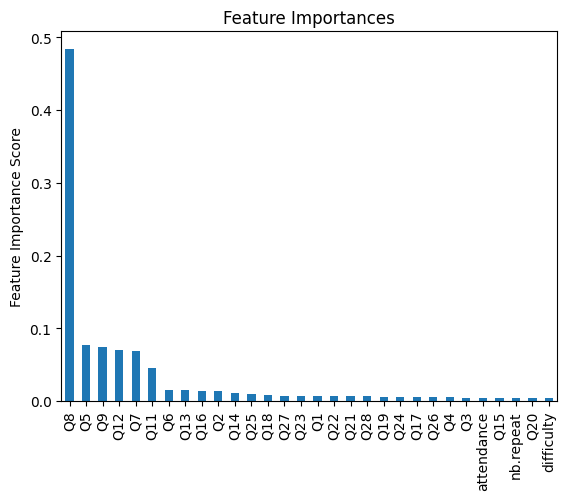

In [28]:
#Experimental support for categorical data is not implemented for current tree method yet. Thus, cannot use enable_categorical=True.
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=6,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb1, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


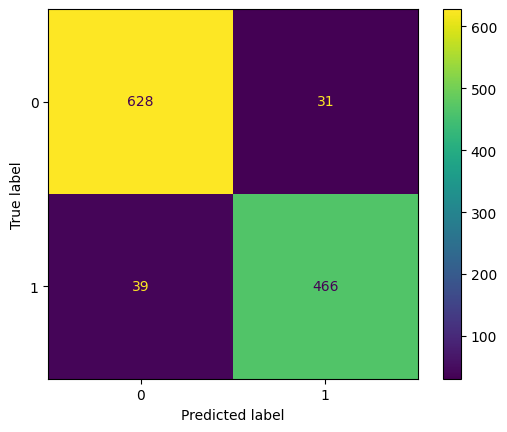

In [44]:
disp_cm(xgb1, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train): 0.9697
AUC Score (Train): 0.994304
Accuracy (Test): 0.9373
AUC Score (Test): 0.985502


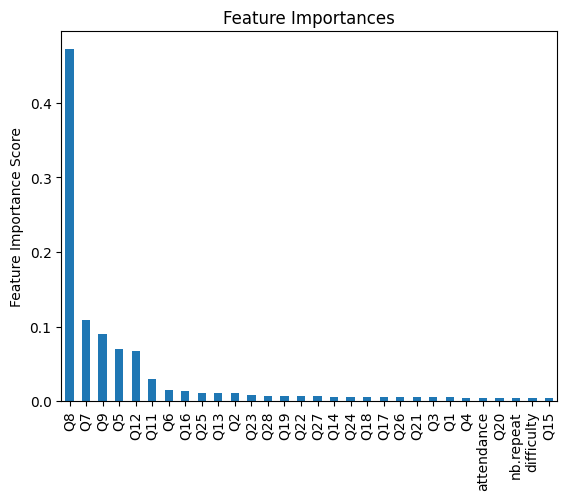

In [53]:
xgb2 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=6,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb2, X_train, y_train, X_test, y_test)

In [65]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=42),
 param_grid = param_test1, scoring='roc_auc',n_jobs=6, cv=5)
gsearch1.fit(X_train,y_train)
#print results
for i in ['mean_test_score', 'std_test_score', 'params']:
        print(i," : ",gsearch1.cv_results_[i])

print(gsearch1.best_params_, gsearch1.best_score_)

mean_test_score  :  [0.98046592 0.98170534 0.98222358 0.97869796 0.97897705 0.98082575
 0.97975878 0.97928073 0.98066123 0.97998103 0.97895017 0.98048671]
std_test_score  :  [0.00324628 0.00297331 0.00348652 0.00404395 0.00382538 0.00317023
 0.00355063 0.00355034 0.00335662 0.00374436 0.00372001 0.00351444]
params  :  [{'max_depth': 3, 'min_child_weight': 1}, {'max_depth': 3, 'min_child_weight': 3}, {'max_depth': 3, 'min_child_weight': 5}, {'max_depth': 5, 'min_child_weight': 1}, {'max_depth': 5, 'min_child_weight': 3}, {'max_depth': 5, 'min_child_weight': 5}, {'max_depth': 7, 'min_child_weight': 1}, {'max_depth': 7, 'min_child_weight': 3}, {'max_depth': 7, 'min_child_weight': 5}, {'max_depth': 9, 'min_child_weight': 1}, {'max_depth': 9, 'min_child_weight': 3}, {'max_depth': 9, 'min_child_weight': 5}]
{'max_depth': 3, 'min_child_weight': 5} 0.9822235758569974


In [66]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=42),
 param_grid = param_test2, scoring='roc_auc',n_jobs=6, cv=5)
gsearch2.fit(X_train,y_train)
#print results
for i in ['mean_test_score', 'std_test_score', 'params']:
        print(i," : ",gsearch2.cv_results_[i])

print(gsearch2.best_params_, gsearch2.best_score_)

mean_test_score  :  [0.98361458 0.98396576 0.98352729 0.98195483 0.98222358 0.98204998
 0.9802799  0.98081315 0.98145243]
std_test_score  :  [0.00261973 0.00303508 0.00322829 0.00322577 0.00348652 0.00336599
 0.00271144 0.00322825 0.00311148]
params  :  [{'max_depth': 2, 'min_child_weight': 4}, {'max_depth': 2, 'min_child_weight': 5}, {'max_depth': 2, 'min_child_weight': 6}, {'max_depth': 3, 'min_child_weight': 4}, {'max_depth': 3, 'min_child_weight': 5}, {'max_depth': 3, 'min_child_weight': 6}, {'max_depth': 4, 'min_child_weight': 4}, {'max_depth': 4, 'min_child_weight': 5}, {'max_depth': 4, 'min_child_weight': 6}]
{'max_depth': 2, 'min_child_weight': 5} 0.9839657602399535


In [67]:
param_test3 = {
 'learning_rate':[0.04,0.07,0.15,0.3]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=42),
 param_grid = param_test3, scoring='roc_auc',n_jobs=6, cv=5)
gsearch3.fit(X_train,y_train)
#print results
for i in ['mean_test_score', 'std_test_score', 'params']:
        print(i," : ",gsearch3.cv_results_[i])

print(gsearch3.best_params_, gsearch3.best_score_)

mean_test_score  :  [0.98509023 0.98450872 0.98219418 0.97835515]
std_test_score  :  [0.00314334 0.00283478 0.0029646  0.00235406]
params  :  [{'learning_rate': 0.04}, {'learning_rate': 0.07}, {'learning_rate': 0.15}, {'learning_rate': 0.3}]
{'learning_rate': 0.04} 0.9850902306312713


In [68]:
param_test4 = {
 'learning_rate':[0.01,0.02,0.03]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=2,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=42),
 param_grid = param_test4, scoring='roc_auc',n_jobs=6, cv=5)
gsearch4.fit(X_train,y_train)
#print results
for i in ['mean_test_score', 'std_test_score', 'params']:
        print(i," : ",gsearch4.cv_results_[i])

print(gsearch4.best_params_, gsearch4.best_score_)

mean_test_score  :  [0.98654125 0.98581965 0.98556428]
std_test_score  :  [0.00348114 0.00326297 0.00326323]
params  :  [{'learning_rate': 0.01}, {'learning_rate': 0.02}, {'learning_rate': 0.03}]
{'learning_rate': 0.01} 0.9865412508505891



Model Report
Accuracy (Train): 0.9487
AUC Score (Train): 0.988787
Accuracy (Test): 0.9364
AUC Score (Test): 0.984686


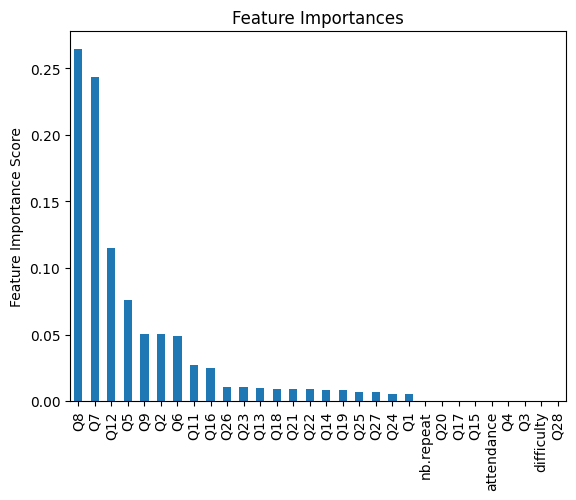

In [70]:
xgb3 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=2,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=6,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb3, X_train, y_train, X_test, y_test)


Model Report
Accuracy (Train): 0.9558
AUC Score (Train): 0.991629
Accuracy (Test): 0.9399
AUC Score (Test): 0.984561


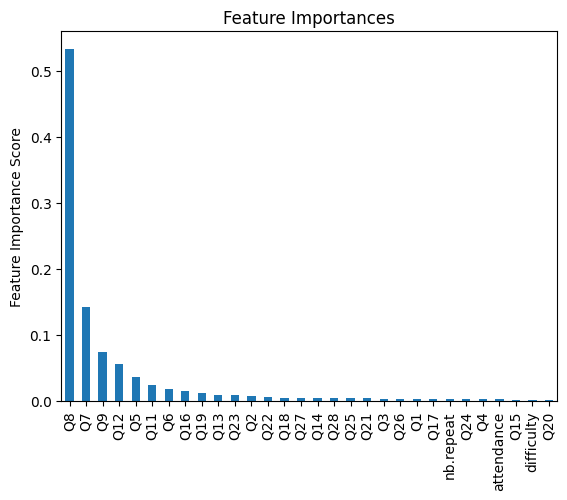

In [72]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=6,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb4, X_train, y_train, X_test, y_test)

###3.2 Random Forest

In [49]:
def RF_score(nt, X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=nt, random_state=42)
    model.fit(X_train, y_train)
    dtrain_preds = model.predict(X_train)
    dtest_preds = model.predict(X_test)
    '''
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train): %.4g" % accuracy_score(y_train, dtrain_preds))
    #print ("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))
    print ("Accuracy (Test): %.4g" % accuracy_score(y_test, dtest_preds))
    #print ("AUC Score (Test): %f" % roc_auc_score(ytest, dtest_predprob))
    '''
    return [accuracy_score(y_train, dtrain_preds), accuracy_score(y_test, dtest_preds)]

In [50]:
RF_score(200, X_train, y_train, X_test, y_test)

[0.9982817869415808, 0.9390034364261168]

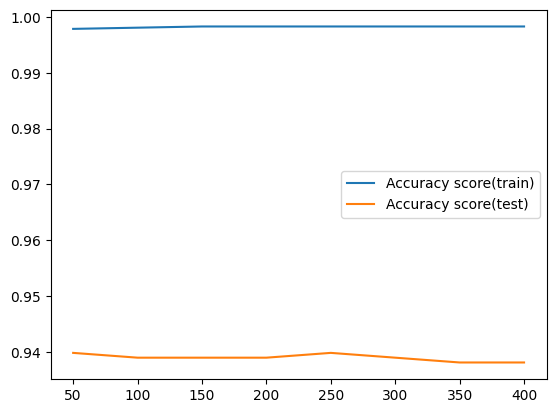

In [52]:
RF_results = {}

for i in range(50,401,50):
    RF_results[i] = RF_score(i, X_train, y_train, X_test, y_test)

plt.plot(list(RF_results.keys()), list(RF_results.values()))
plt.legend(['Accuracy score(train)','Accuracy score(test)'])
plt.show()

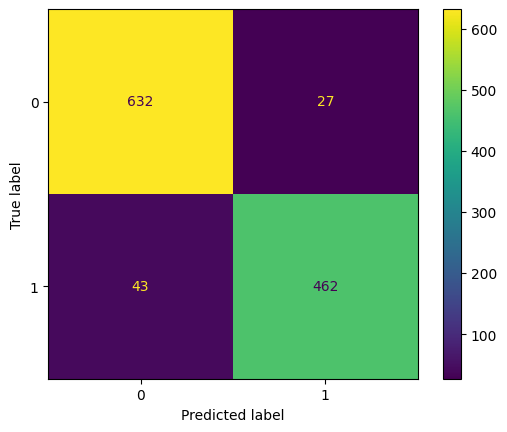

In [73]:
model1 = RandomForestClassifier(n_estimators=250, random_state=42)
model1.fit(X_train, y_train)
dtest_preds = model1.predict(X_test)
#Display confusion matrix
cm1 = confusion_matrix(y_test, dtest_preds)
ConfusionMatrixDisplay(cm1).plot()

Text(0, 0.5, 'Feature Importance Score')

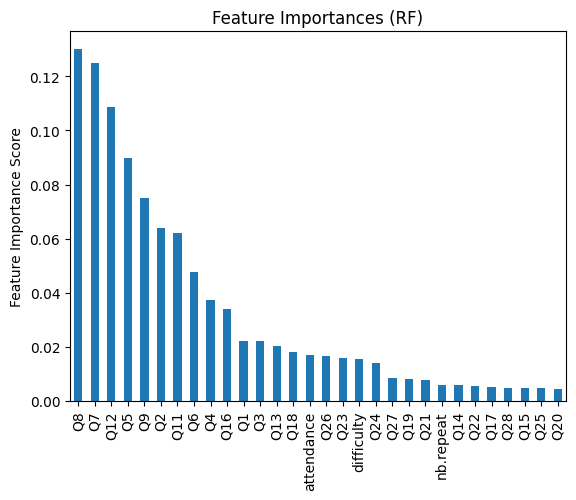

In [75]:
#Plot feature importances
feat_imp = pd.Series(model1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances (RF)')
plt.ylabel('Feature Importance Score')

##4. Conclusion
Both XGBClassifier and Random Forest Classifier can predict Q10 with high accuracy (accuracy_score ≈ 0.94). From [EDA](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-2-EDA/EDA-Team-3/Final_EDA/Final%20EDA%20Report.pdf), we knew that Q10 is strongly correlated with Q1, 5-9, so it is not surprising to see that Q8,5,7,9 contribute significantly (see the feature importances plots). However, it seems that Q8 is always dominant, especially in XGB models. Also, Q1 and 6 always contribute much less that Q8,5,7,9. XGB models depend on fewer features than RF models. These distinctions are important because they influence the interpretation of our modeling results.